<a href="https://colab.research.google.com/github/HknyYtbz/cng-562/blob/master/YATBAZ_adult_census_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [0]:
import numpy as np
import pandas as pd

Please upload your Kaggle API JSON named as kaggle.json to download the data


In [0]:
from google.colab import files
#Kaggle api key upload
files.upload()
#Essential downloads for the project, especially the kaggle dataset download
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json 
!kaggle datasets download -d uciml/adult-census-income
!ls


Saving kaggle.json to kaggle.json
  0% 0.00/465k [00:00<?, ?B/s]
100% 465k/465k [00:00<00:00, 71.5MB/s]
adult-census-income.zip  kaggle.json  sample_data


In [0]:
df = pd.read_csv('/content/adult-census-income.zip', compression='zip', header=0, sep=',', quotechar='"')
#To get the number of rows with NA value
df= df.replace('?', np.nan)
df_v2 = df

 # Helper Functions

I have 4 helper function that I wrote in my first iteration.

1.   **categorical_to_dumy**: It has the same effect as the pandas get dummies function except removing one of the columns to avoid dummy trap. I updated my implementation with get dummies yet left this function to improve for my needs later on

2.   **categorical_to_numeric**: I puts values to categorical variables between 0 - number of unique elements to make them numerrical

3. **mapping**: This function is written to apply categorical to numberic function at one run to the dataset with apply function

4. **makeInt**: This is a mapping function from Boolean to Integer, again it is implemented to be used with apply function to the DataFrame



In [0]:
mapping_table = None
#Helper Functions for Preprocessing and Analysis (Not all used)
def makeInt(x):
  return 1 if x==True else 0
def categorical_to_dumy(st,df):
  for elem in df[st].unique():
    df[str(elem)] = df[st] == elem
    df[str(elem)] = df[str(elem)].apply(makeInt)
  df = df.drop(st, axis=1)
  return df

def mapping(x):
  global mapping_table
  return mapping_table[x]
  
def categorical_to_numeric(st,df): #quite inefficient way
  global mapping_table
  mapping_table = dict(zip(df[st].unique(), range(len(df[st].unique()))))
  return df[st].apply(mapping)
#df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income'], drop_first=True)


# Preprocessing

As a preprocessing, I first checked some properties to understand the data better. The flow is as follows:

1.   Get general information about each variable, their min, max, mean values etc.
2.   Get the percentage of NA values for each column to decide on a strategy for handling missing data. *** In this dataset  the NA values were in categorical values with a percentage less than 20% (around 0-6%), so I fill them with the most occured values (mode).*** . However, the code given is  handling the  both continous variables and discerete variables  by putting mean (if continous) and mode (if discrete) value to the NA values.
3. After handling missing data, the continous variables are normalized with a minmax scaler to make them between zero and one, so that it will be more accurate to use them in the models.
4. Lastly, the categorical variables are converted into numeric values between 0 to number of unique elements in that variable. Pandas get_dummies dunction could be used as well to have a better representation of the data for machine learning models




In [0]:
dimension = df.shape
"""
#Column Information Retrieval
for j in range(dimension[1]):
  print(df[df.columns[j]].describe())
  print("--------------------")
#NA Value Information Retrieval
print("----Number of NA's-------")
for j in range(dimension[1]):
     #print(df.columns[j],df.iloc[:,j].isnull().values.ravel().sum())
     print("%s:%.2f%%"%(df.columns[j],(df.iloc[:,j].isnull().values.ravel().sum()/len(df.iloc[:,j].values)*100.0)))
"""
#Missing value handling and check
for j in df.columns:
  if df[j].dtype.name=='object':
    df[j].fillna(df[j].mode()[0],inplace=True)
  else:
    df[j].fillna(df[j].mean(),inplace=True)
df.head()

print("----Number of NA's-------")
for j in range(dimension[1]):
     #print(df.columns[j],df.iloc[:,j].isnull().values.ravel().sum())
     print("%s:%.2f%%"%(df.columns[j],(df.iloc[:,j].isnull().values.ravel().sum()/len(df.iloc[:,j].values)*100.0)))

from sklearn.preprocessing import minmax_scale
for i in df.columns:
  if df[i].dtype.name != 'object':
    # Fit your data on the scaler object
     df[i] = pd.DataFrame(minmax_scale(df[i]))   
#Convert categorical values to numeric
"""
#My code for dummies I used pandas version
for i in df.columns:
  if df[i].dtype.name == 'object':
    if i != "income":
      df = categorical_to_dumy(i,df)
    else:
      df[i] = categorical_to_numeric(i,df)
df.head()
"""
for i in df.columns:
  if df[i].dtype.name == 'object':
    df[i] = categorical_to_numeric(i,df)
df.head()

----Number of NA's-------
age:0.00%
workclass:0.00%
fnlwgt:0.00%
education:0.00%
education.num:0.00%
marital.status:0.00%
occupation:0.00%
relationship:0.00%
race:0.00%
sex:0.00%
capital.gain:0.00%
capital.loss:0.00%
hours.per.week:0.00%
native.country:0.00%
income:0.00%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packa

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,0,0.043987,0,0.533333,0,0,0,0,0,0.0,1.000000,0.397959,0,0
1,0.890411,0,0.081896,0,0.533333,0,1,0,0,0,0.0,1.000000,0.173469,0,0
2,0.671233,0,0.118021,1,0.600000,0,0,1,1,0,0.0,1.000000,0.397959,0,0
3,0.506849,0,0.086982,2,0.200000,1,2,1,0,0,0.0,0.895317,0.397959,0,0
4,0.328767,0,0.171404,1,0.600000,2,0,2,0,0,0.0,0.895317,0.397959,0,0


# Dimensionalty Reduction & Feature Selection


I tried 3 different methods to eliminate features just to see their effect.

## Feature Importance

In [0]:
y = df["income"]
x = df.drop("income", axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


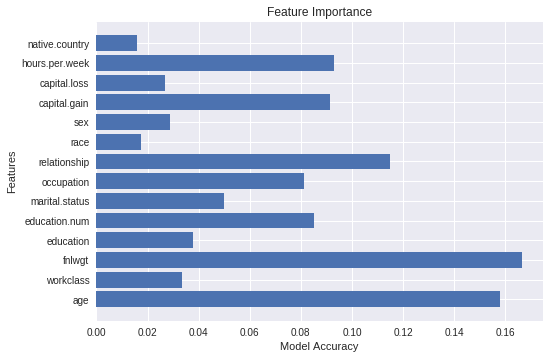

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x, y)
values = model.feature_importances_
#print(x.shape)

# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, values, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, x.columns)
plt.grid(True)

Selected the columns with higher importance values. 

In [0]:
x_version1 = df[["age","fnlwgt","marital.status","hours.per.week"]]

## Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(x, y)
selected = [x.columns[i]  for i in range(len(fit.support_)) if fit.support_[i]]
x_version2 = x[selected]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Principal Component Analysis (PCA)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
x_version3 = pd.DataFrame(data = principalComponents)

# Model Selection



## KNN

### Non-Modified X

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
print(param_grid)
#Initial Try with desicion trees
classifier = KNeighborsClassifier()

gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
gd_sr.fit(x_train, y_train) 

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]}


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print("Neighbors: %d\tScore: %.2f"%(gd_sr.best_params_['n_neighbors'],gd_sr.best_score_))

Neighbors: 19	Score: 0.83


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

### X Version 1

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version1, y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(10,35))}
print(param_grid)
#Initial Try with desicion trees
classifier = KNeighborsClassifier()

gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
gd_sr.fit(x_train, y_train) 


{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]}


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print("Neighbors: %d\tScore: %.2f"%(gd_sr.best_params_['n_neighbors'],gd_sr.best_score_))

Neighbors: 21	Score: 0.78


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

### X Version 2

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version2, y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(10,35))}
print(param_grid)
#Initial Try with desicion trees
classifier = KNeighborsClassifier()

gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
gd_sr.fit(x_train, y_train) 

{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]}


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print("Neighbors: %d\tScore: %.2f"%(gd_sr.best_params_['n_neighbors'],gd_sr.best_score_))

Neighbors: 30	Score: 0.79


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

### X Version 3

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version3, y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(10,35))}
print(param_grid)
#Initial Try with desicion trees
classifier = KNeighborsClassifier()

gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
gd_sr.fit(x_train, y_train) 

{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]}


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print("Neighbors: %d\tScore: %.2f"%(gd_sr.best_params_['n_neighbors'],gd_sr.best_score_))

Neighbors: 33	Score: 0.81


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier(n_neighbors=33)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

## SVM

### Non Modified X

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train) 
grid_search.best_params_

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

### X Version 1

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x_version1, y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train) 
grid_search.best_params_

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

### X Version 2

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x_version2, y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train) 
grid_search.best_params_

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

### X Version 3


In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x_version3, y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train) 
grid_search.best_params_

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

## Logistic Regression

**I made solver 'liblinear' because it is default and when I omit that, it gives many warnings in the output**

### Non-Modified X

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
classifier=LogisticRegression(solver='liblinear')
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 1.0, 'penalty': 'l1'}	 Best Score: 0.84


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=1,penalty='l1')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.845


### X Version 1

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version1, y, test_size=0.2, random_state=1)
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
classifier=LogisticRegression(solver='liblinear')
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 0.001, 'penalty': 'l1'}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=0.001,penalty='l1')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.759


### X Version 2

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version2, y, test_size=0.2, random_state=1)
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
classifier=LogisticRegression(solver='liblinear')
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=100,penalty='l2')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.814


### X Version 3

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version3, y, test_size=0.2, random_state=1)
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
classifier=LogisticRegression(solver='liblinear')
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=0.001,penalty='l2')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.799


##Decision Tree

In [0]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid =  [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

### Non-Modified X

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 10}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth= 11, min_samples_leaf= 10)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.861


### X Version 1

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version1, y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 100}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth= 11, min_samples_leaf= 100)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.828


### X Version 2

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version2, y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 20}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 20)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.828


### X Version 3

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_version3, y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth= 8, min_samples_leaf= 20)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.828


# Preprocessing with Dummy Variables

In addition to the method I used for the categorical values in the previous part. I have also converted the categorical data  to dummy variables by using get_dummies method of pandas library.

In [0]:
dimension = df_v2.shape
"""
#Column Information Retrieval
for j in range(dimension[1]):
  print(df[df.columns[j]].describe())
  print("--------------------")
#NA Value Information Retrieval
print("----Number of NA's-------")
for j in range(dimension[1]):
     #print(df.columns[j],df.iloc[:,j].isnull().values.ravel().sum())
     print("%s:%.2f%%"%(df.columns[j],(df.iloc[:,j].isnull().values.ravel().sum()/len(df.iloc[:,j].values)*100.0)))
"""
#Missing value handling and check
for j in df_v2.columns:
  if df_v2[j].dtype.name=='object':
    df_v2[j].fillna(df_v2[j].mode()[0],inplace=True)
  else:
    df_v2[j].fillna(df_v2[j].mean(),inplace=True)
df_v2.head()

print("----Number of NA's-------")
for j in range(dimension[1]):
     #print(df.columns[j],df.iloc[:,j].isnull().values.ravel().sum())
     print("%s:%.2f%%"%(df_v2.columns[j],(df_v2.iloc[:,j].isnull().values.ravel().sum()/len(df_v2.iloc[:,j].values)*100.0)))

from sklearn.preprocessing import minmax_scale
for i in df_v2.columns:
  if df_v2[i].dtype.name != 'object':
    # Fit your data on the scaler object
     df_v2[i] = pd.DataFrame(minmax_scale(df_v2[i]))   
#Convert categorical values to numeric
"""
#My code for dummies I used pandas version
for i in df.columns:
  if df[i].dtype.name == 'object':
    if i != "income":
      df = categorical_to_dumy(i,df)
    else:
      df[i] = categorical_to_numeric(i,df)
df.head()
"""
df_v2 = pd.get_dummies(df_v2, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], drop_first=True)
df_v2["income"] = categorical_to_numeric("income",df_v2)
df_v2.head()

----Number of NA's-------
age:0.00%
workclass:0.00%
fnlwgt:0.00%
education:0.00%
education.num:0.00%
marital.status:0.00%
occupation:0.00%
relationship:0.00%
race:0.00%
sex:0.00%
capital.gain:0.00%
capital.loss:0.00%
hours.per.week:0.00%
native.country:0.00%
income:0.00%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packa

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_0.14285714285714285,workclass_0.2857142857142857,workclass_0.42857142857142855,...,native.country_0.775,native.country_0.8,native.country_0.8250000000000001,native.country_0.8500000000000001,native.country_0.875,native.country_0.9,native.country_0.925,native.country_0.9500000000000001,native.country_0.9750000000000001,native.country_1.0
0,1.000000,0.043987,0.533333,0.0,1.000000,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.890411,0.081896,0.533333,0.0,1.000000,0.173469,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.671233,0.118021,0.600000,0.0,1.000000,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.506849,0.086982,0.200000,0.0,0.895317,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.328767,0.171404,0.600000,0.0,0.895317,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection with Dummy Variables

In [0]:
from sklearn.model_selection import train_test_split
yv2 = df_v2["income"]
xv2 = df_v2.drop("income", axis=1)
xv2_train, xv2_test, yv2_train, yv2_test = train_test_split(xv2, yv2, test_size=0.2, random_state=1)


## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier()

gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=3)
gd_sr.fit(xv2_train, yv2_train) 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print("Neighbors: %d\tScore: %.2f"%(gd_sr.best_params_['n_neighbors'],gd_sr.best_score_))

Neighbors: 24	Score: 0.83


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier(n_neighbors=24)
classifier.fit(xv2_train, yv2_train)  
y_pred = classifier.predict(xv2_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.837


## SVM

Here I changed the parameters of the SVM since it take around 9 hours to check the results with grid search. Hence, there might be a better model that I could not able to see.

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
classifier = SVC()
param_grid = {'C': [ 0.01, 0.1, 1], 'gamma' : [ 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(xv2_train, yv2_train) 
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier=SVC(C= 1, gamma= 0.1)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.829


## Logistic Regression

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
classifier=LogisticRegression(solver='liblinear')
grid_search=GridSearchCV(classifier,param_grid,cv=3)
grid_search.fit(xv2_train,yv2_train)
grid_search.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=10,penalty='l2')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.845


## Decision Tree

In [0]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid =  [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=3)
grid_search.fit(xv2_train,yv2_train)
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20}

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=8,min_samples_leaf=20)
classifier.fit(xv2_train, yv2_train)  
y_pred = classifier.predict(xv2_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.860


# Conclusion

In this dataset, there are many categorical values and some missing values to deal with. Hence, the preprocessing stage is critical for this dataset. I mainly used two different approach to handle categorical data. Firstly, I mapped the values for each categorical variable to numerical values between zero to number of unique elements -1. Even though it affects the performance of the models negatively, it was helpful to try feature elimination or selection process. Secondly, I get dummy variables for the each categorical data column and implemented the same models that I used in this dataset.

I used SVM, Decision Tree, Logistic Regression and KNN and used both grid search and based on the results of grid search I train the model and calculate the "Accuracy" with the test data where the ration for train-test is 80-20 percent. After this processes, I selected the  Decision Tree model with parameter max_depth=8 and min_sample_leaf=20 which gave me 86% accuracy.

As a future work, further statistical analysis can be done to understand the relations between each variable to costruct a better model.

All in all, in this dataset, I have learned that the importance of the exploration of the dataset to extract features, i.e. meaningful features that can represent data properly in the learning models. Furthermore, I had a chance to explore the problems faced with complex data (I mean composition of discrete and continous data) and their advantages and drawbacks in terms of accuracy, computation resources and time consumed.